# APPLYING LINEAR REGRESSION

In [1]:
import pandas as p
import numpy as n
import matplotlib.pyplot as plt
import seaborn as s
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df=p.read_excel("sparks.xlsx") 

In [5]:
df.head(24)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
#Creating a new column
new_df = df.assign(Grades=['F','C','F','B+','F','F','A','C+','A','F','A','B','C','C','F','A+','F','F','B','B','F','C+','D','B+','A'])
new_df

,Hours,Scores,Grades
0,2.5,21,F
1,5.1,47,C
2,3.2,27,F
3,8.5,75,B+
4,3.5,30,F
5,1.5,20,F
6,9.2,88,A
7,5.5,60,C+
8,8.3,81,A
9,2.7,25,F


In [8]:
new_df['Grade_Points']=new_df.Grades.map({'F':3,'C':5,'B+':8,'A':9,'C+':6,'B':7,'A+':10,'D':4})

In [9]:
new_df.head()

,Hours,Scores,Grades,Grade_Points
0,2.5,21,F,3
1,5.1,47,C,5
2,3.2,27,F,3
3,8.5,75,B+,8
4,3.5,30,F,3


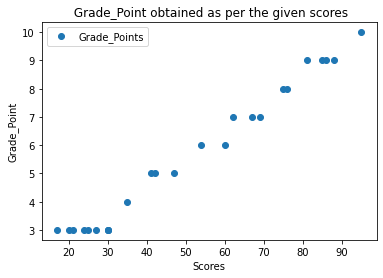

In [10]:
new_df.plot(x='Scores', y='Grade_Points', style='o')  
plt.title(' Grade_Point obtained as per the given scores')  
plt.xlabel('Scores')  
plt.ylabel('Grade_Point')  
plt.show()

In [11]:
del new_df['Grades']

In [12]:
del new_df['Grade_Points']

# Preparing the data

In [13]:
# dividing the data into "attributes" (inputs) and "labels" (outputs).
X = new_df.iloc[:, :-1].values  
y = new_df.iloc[:, 1].values 

In [14]:
# division into training and test sets.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [15]:
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import cross_val_score
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


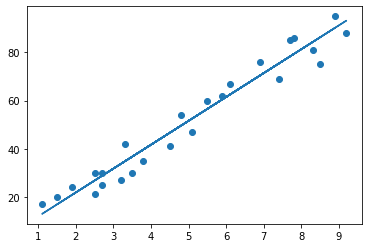

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [17]:
len(X_test)   #no of values used for testing

5

In [18]:
X_test #values we are going to test on which are random

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [19]:
X_train        #samples used to train our model

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

# Making Predictions

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
new_df = p.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
new_df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#  **Evaluating the model**


In [22]:
#using  mean square error method
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


In [23]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [24]:
#evaluation using cross_validation and accuracy prediction.
logR= LinearRegression()  #object of a class

logR.fit(X_train,y_train) 

predictR = logR.predict(X_test)  #ready to make predictions by calling predict method
# Accuracy is the correctly classified data instances over the total number of data instances.
# Cross validation is to evaluate our models
accuracy = cross_val_score(logR ,X, y, cv=7) #splitting the data according to cv dividing it into training and testing
print("Cross validation test results of accuracy:")
print(accuracy)
print("")
# get mean of every field
print("Accuracy result of Linear Regression is:",accuracy.mean()*100)
print("")

Cross validation test results of accuracy:
[0.82693982 0.96699146 0.96136498 0.95685734 0.947379   0.92151479
 0.90298624]

Accuracy result of Linear Regression is: 92.629051658125

